<font size = "5"> **Chapter 2: [Diffraction](Ch2-Diffraction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />


# Atomic Form Factor

part of 


<font size = "5"> **[Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)**</font>


by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes

## Import numerical and plotting python packages

In [2]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook

# additional package 
import scipy.constants as const

# Import libraries from the book
import pyTEMlib.KinsCat as ks         # Kinematic sCattering Library
                             # with Atomic form factors from Kirklands book

Populating the interactive namespace from numpy and matplotlib
Using KinsCat library version  0.5  by G.Duscher
spglib not installed; Symmetry functions of spglib disabled
windows


## Coulomb Force

The electron scatters at the Coulomb force of the screened nucleus of an atom. This force is:

$\mathbf{F} = \frac{1}{4\pi\varepsilon_0}\frac{Qq}{r^2}\mathbf{\hat{e}}_r 
=  k_\text{e}\frac{Qq}{r^2}\mathbf{\hat{e}}_r $

$k_\text{e} = \frac{1}{4\pi\varepsilon_0}= 8.987\,551\,787\,368\,1764\times 10^9~\mathrm{N\ m^2\ C^{-2}}$


In [3]:
Z = 79 # gold

k_e = 1/(4* const.pi * const.epsilon_0)
F_r_m = k_e * Z* const.e**2 /const.m_e
print(f" k_e   = {k_e:.1f} N m\u00b2C\u207B\u00b2")
print(f" F_r_m = {F_r_m:.1f} N m\u00b2 kg\u207B\u00B9 = {F_r_m:.1f} m\u00b3s\u207B\u00B2")

 k_e   = 8987551787.4 N m²C⁻²
 F_r_m = 20007.8 N m² kg⁻¹ = 20007.8 m³s⁻²


<IPython.core.display.Javascript object>


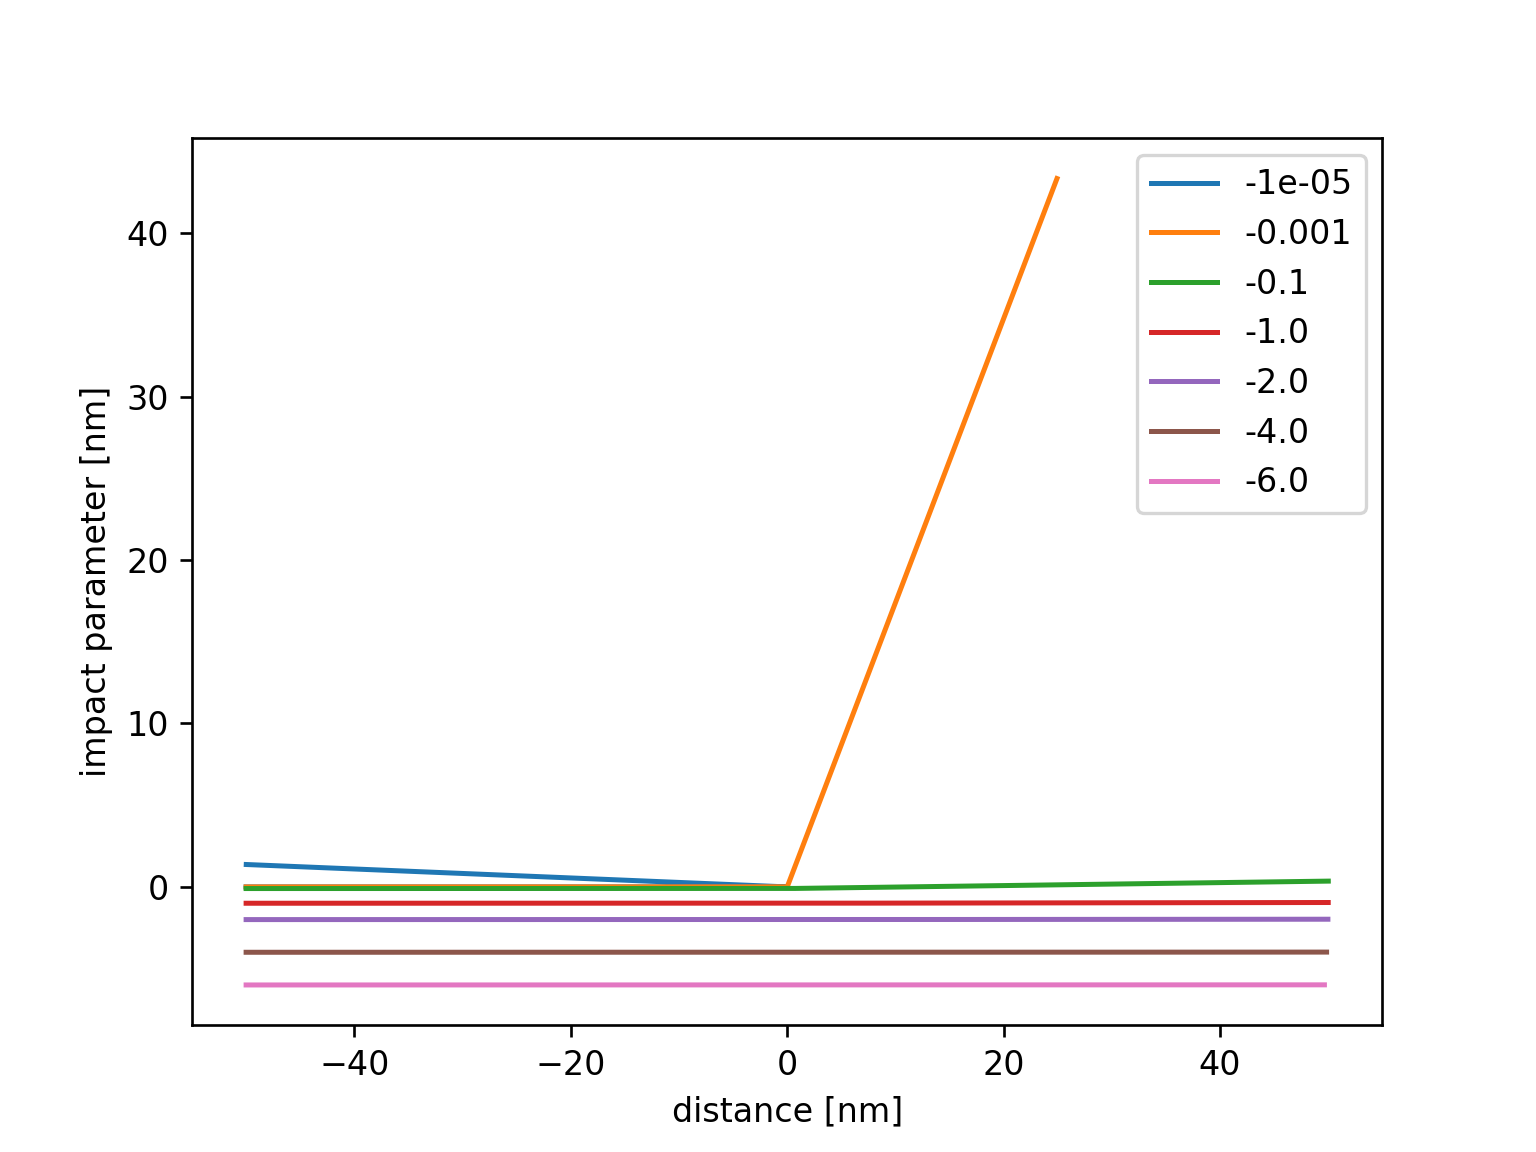

In [4]:
def coulomb_plot(impact_param = 1.0, Z = 79, v_c = 0.5):
    # all length are in m
    #time interval for each iteration. Should be chosen small enough so that
    #the velocity change and position change in this interval is relatively
    #small. If too small this calculation will take a while
    dt = 1e-20 # s
    
    x = -50.0*1e-9 # starting x in m
    y = impact_param*1e-9  #in m
    #starting y
    x_coords=[x] #array for the x coordinates of the plot
    y_coords=[y] #array for the y coordinates of the plot
    vx = v_c * const.c #initial x velocity in m/s
    vy = 0.0 #initial y velocity
    
    r = np.sqrt(x*x + y*y)
    rold = r*2 # an arbitrary value more than r

    k_e = 1/(4* const.pi * const.epsilon_0) #[N m^2 C^-2]
    F_r_m = -k_e * Z* const.e**2/const.m_e # [ N m^2 / kg]
    
    # The plot coordinates are generated as long as the incident particle
    # is going towards the origin( which means that r < rold )
    # or
    # if it is coming out, as long as r < 50.0 nm. You can choose this to be
    # something else.
    while (r < rold) or ( r < 50.0*1e-9) :
        rold = r # old r is changed to the current r
        x = x + vx*dt# calculate new x
        y = y + vy*dt# calculate new y
        # add x and y to the plotting coordinates for x and y
        x_coords.append(x)
        y_coords.append(y)
        r = np.sqrt(x*x + y*y)
        
        #vx = vx + x-acceleration*dt = vx + Fx/m*dt 
        #Fx = x component of Coulomb force = (magnitude of F)*cos(theta) =
        #(magnitude of F)*x/r = 
        #vx = vx + (F_r/m/r^2)*x/r = F_r_m * x/r^3,
        vx = vx + F_r_m*x/r**3*dt
        #as for vx
        vy = vy + F_r_m*y/r**3*dt
        
    return np.array(x_coords), np.array(y_coords)


#plotting trajectories for 4 impact parameters
plt.figure()
for b in [-1e-5, -0.001, -0.1, -1.0, -2.0, -4.0, -6.0]:
    xc, yc = coulomb_plot(b, Z= 79, v_c = 0.7)
    plt.plot(xc*1e9,yc*1e9, label = str(b))

plt.xlabel('distance [nm]')
plt.ylabel('impact parameter [nm]')
plt.legend();

Above graph was calulated for 200keV electrons.
What changes if you change the v_c = v/c parameter to higher or lower speeds?

|E (keV)|$\lambda$ (pm) | M/m$_0$ | v/c|
--------|---------------|---------|----|
|10 |  12.2 | 1.0796 | 0.1950 |
|30 | 6.02 | 1.129 | 0.3284 |
|100 | 3.70 | 1.1957 | 0.5482|
|200 | 2.51 | 1.3914 |  0.6953|
|400 | 1.64 | 1.7828 | 0.8275 |
|1000 | 0.87 | 2.9569 | 0.9411|

You can also change the atom number.

<IPython.core.display.Javascript object>


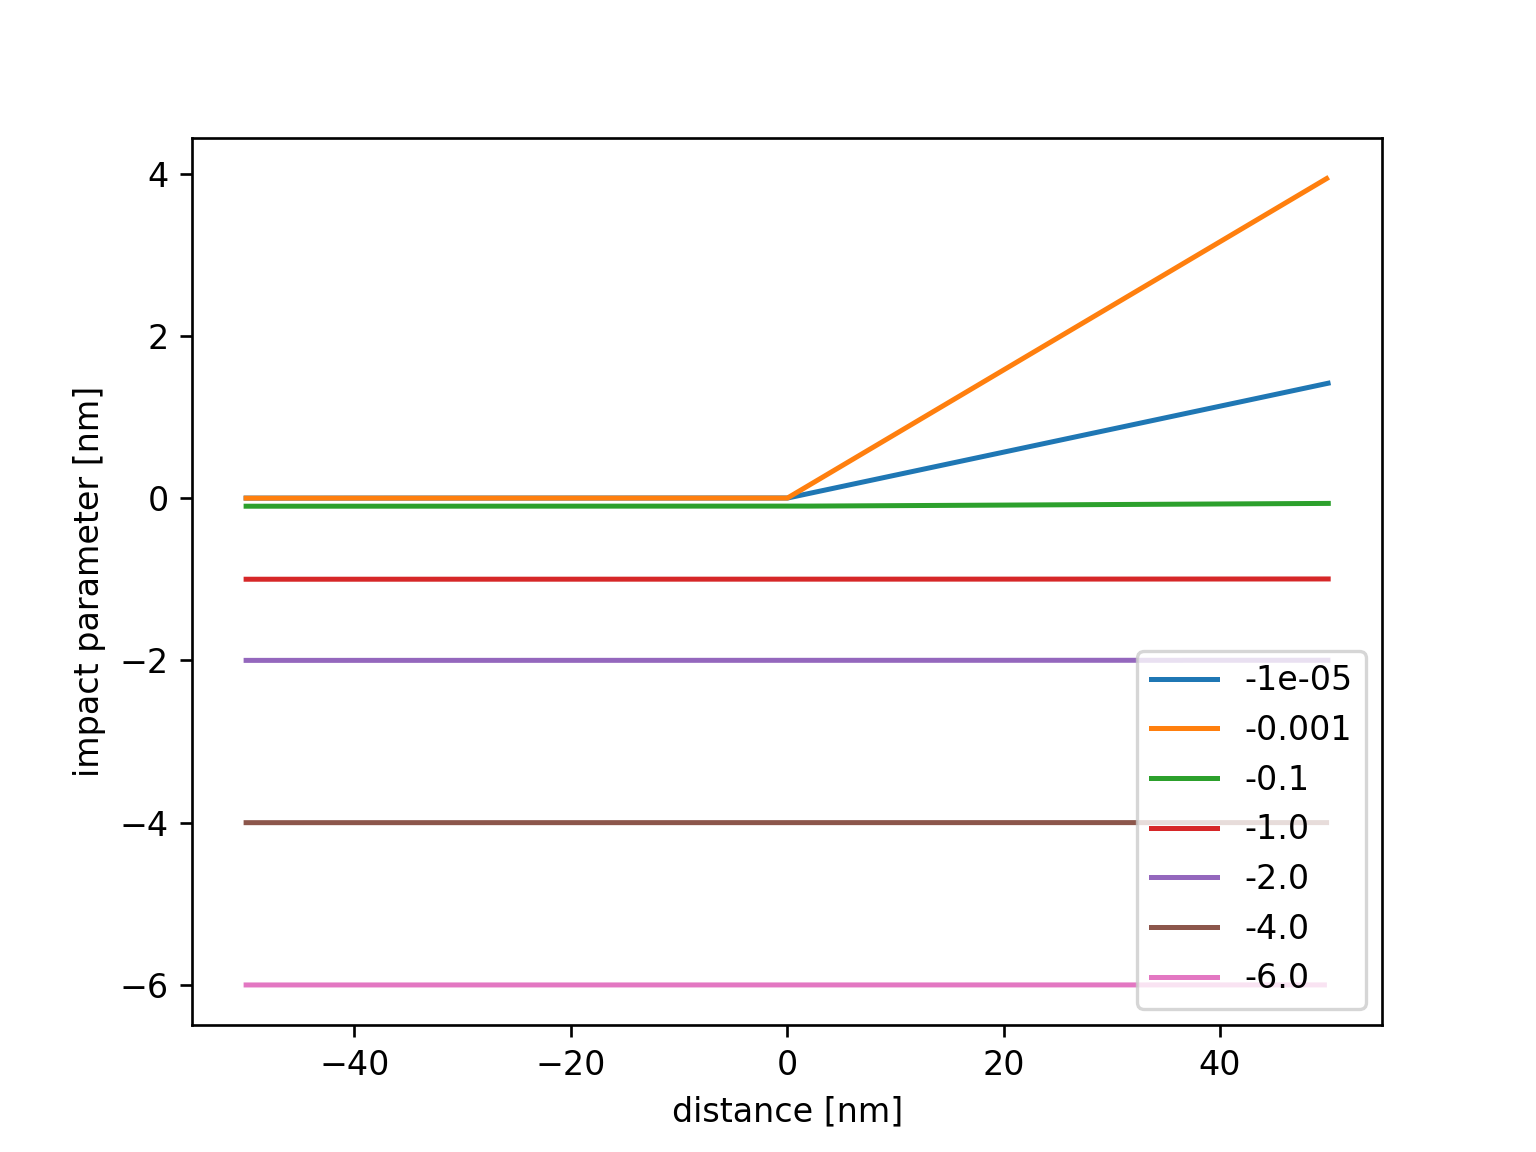

In [5]:
#plotting trajectories for 7 impact parameters
plt.figure()
for b in [-1e-5, -0.001, -0.1, -1.0, -2.0, -4.0, -6.0]:
    xc, yc = coulomb_plot(b, Z= 6, v_c = 0.7)
    plt.plot(xc*1e9,yc*1e9, label = str(b))

plt.xlabel('distance [nm]')
plt.ylabel('impact parameter [nm]')
plt.legend()
plt.show()

If we look at the scattering power of a single atom that deflects an electron:
    
![Ewald Sphere](images/scattering_single_atom.jpg)

The scattering power is dependent on the so-called atomic form factor $f_e$ ( the subscript $_e$ means this is for electrons).

99
Since an electron scatters through the coulomb force of the (screend) nucleus, the form factor is the inner potential.
We can 9



## Tabulated Atomic Form Factors
The calculated form factors are tabulated and can be plotted according to the momentum transfer.

Here we use the values from Appendix C of Kirkland, "Advanced Computing in Electron Microscopy", 2nd ed.

The calculation of electron form factor for specific $q$ perfommed by the KinsCat function *feq* using equation Kirkland C.17

<IPython.core.display.Javascript object>


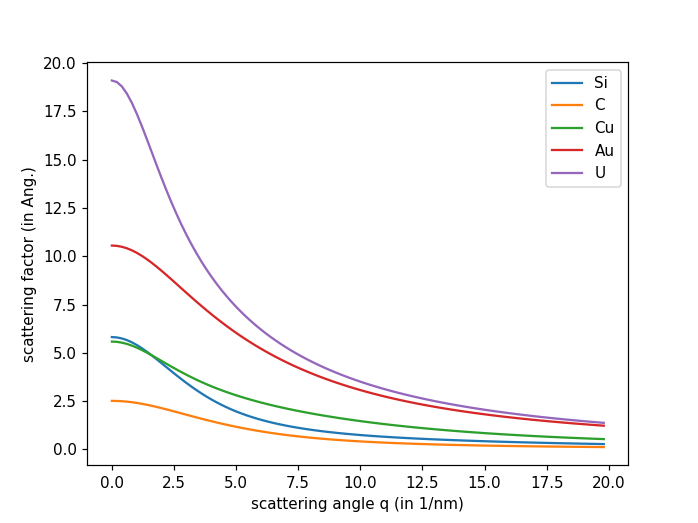

In [5]:
# recreating figure 5.8 of Kirkland, "Advanced Computing in Electron Microscopy" 2nd ed.   
x = []
ySi = []
yC = []
yCu =[]
yAu =[]
yU = []
for i in range(100):
    x.append(i/5)
    ySi.append(ks.feq('Si', i/5))
    yC.append(ks.feq('C', i/5))
    yCu.append(ks.feq('Cu', i/5))
    yAu.append(ks.feq('Au', i/5))
    yU.append(ks.feq('U', i/5))
fig = plt.figure()
plt.plot(x,ySi,label='Si')
plt.plot(x,yC,label='C')
plt.plot(x,yCu,label='Cu')
plt.plot(x,yAu,label='Au')
plt.plot(x,yU,label='U')
plt.legend()
plt.ylabel('scattering factor (in Ang.)')
plt.xlabel('scattering angle q (in 1/nm)')
plt.show()


Adding atoms in a row makes the atom just look heavier:

![Structure Factor](images/form_factor.jpg)

Similar effects appear if atoms are periodically arranged. That is discussed in more detail in the 
[Structure Factors](CH2-Structure_Factors.ipynb) notebook.

## Conclusion
The scattering power of an atom is given by the tabulated scattering factors. As long as there are no dynamic effects the scattering factors can be combined linearly.

Next we need to transfer out knowledge into a  diffraction pattern.

# Navigation
## Back: [The Electron](CH2-Electron.ipynb)
## Next: [Basic Crystallography](CH2-Basic_Crystallography.ipynb)
## Chapter 2: [Diffraction](CH2-_Diffraction.ipynb)
## List of Content: [Front](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)
